In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
circuits_branch = pd.read_csv("circuits x1 AND x2 branch.csv")

In [3]:
circuits_branch

,function,entanglement,equanimity,x1 AND x2,x3 AND x4,circuit,depth,width,size
0,3234840783,3,10.67500,8,2,((x1 AND x2) OR (not(x3) AND not(x2))),3,2,3
1,3233857728,3,6.80313,8,2,((x1 AND x2) OR (x4 AND not(x4))),2,2,3
2,3237986496,4,11.65390,8,2,((x1 AND x2) OR (not(x3) AND x4)),3,2,3
3,4089508800,3,10.67500,8,6,((x1 AND x2) OR (x3 AND not(x1))),3,2,3
4,3520188881,3,10.67500,8,4,((x1 AND x2) OR (not(x0) AND not(x1))),2,2,3
...,...,...,...,...,...,...,...,...,...
517326,2863333585,8,7.35587,4,4,((((x1 AND x2) OR (not(x1) AND not(x0))) AND (...,4,5,12
517327,324342608,6,8.93008,2,3,((((x1 AND x2) OR (x3 AND not(x2))) AND ((not(...,4,6,12
517328,4278727424,5,12.44090,2,8,((((x1 AND x2) OR (x1 AND x4)) AND ((not(x2) A...,4,6,13
517329,581579680,6,8.93008,2,2,((((x1 AND x2) OR (x0 AND x4)) AND ((x3 AND no...,4,6,12


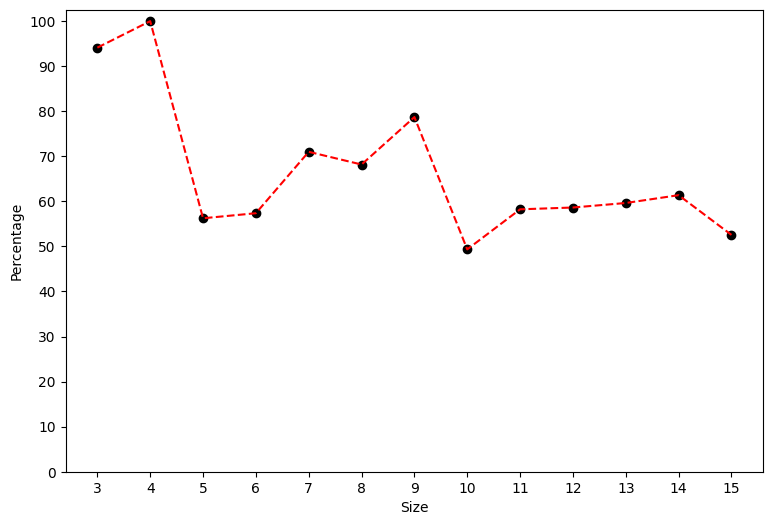

In [31]:
# Compare the number of 1s in x1 AND x2 with x3 AND x4 with respect the size of the circuit
fig, ax = plt.subplots(figsize=(9,6))

X = np.array(list(set(circuits_branch["size"])))
Y = np.array([len(circuits_branch[(circuits_branch["size"] == size) & (circuits_branch["x1 AND x2"] > circuits_branch["x3 AND x4"])]) * 100 / 
              len(circuits_branch[circuits_branch["size"] == size]) for size in X])

plt.plot(X, Y, 'r--')
plt.scatter(X, Y, color='black')

plt.xticks(X)
plt.yticks(np.arange(0,110,10))

plt.xlabel("Size")
plt.ylabel("Percentage")
plt.show()

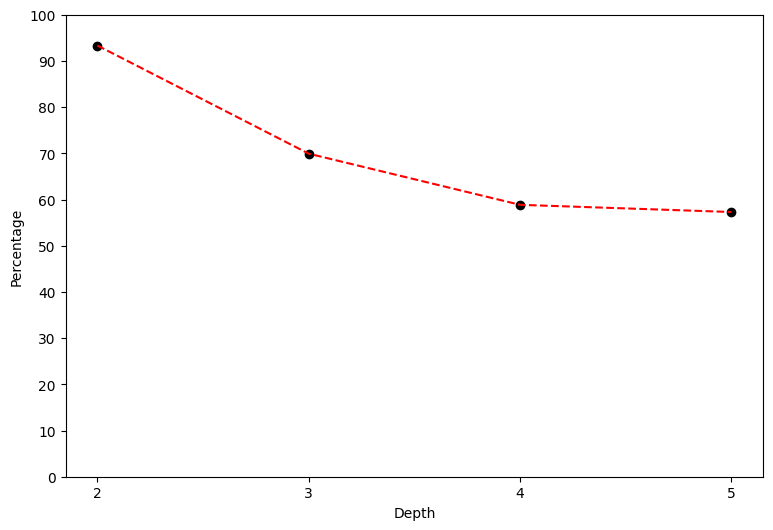

In [32]:
# Compare the number of 1s in x1 AND x2 with x3 AND x4 with respect the depth of the circuit
fig, ax = plt.subplots(figsize=(9,6))

X = np.array(list(set(circuits_branch["depth"])))
Y = np.array([len(circuits_branch[(circuits_branch["depth"] == depth) & (circuits_branch["x1 AND x2"] > circuits_branch["x3 AND x4"])]) * 100 / 
              len(circuits_branch[circuits_branch["depth"] == depth]) for depth in X])

plt.plot(X, Y, 'r--')
plt.scatter(X, Y, color='black')

plt.xticks(X)
plt.yticks(np.arange(0,110,10))

plt.xlabel("Depth")
plt.ylabel("Percentage")
plt.show()

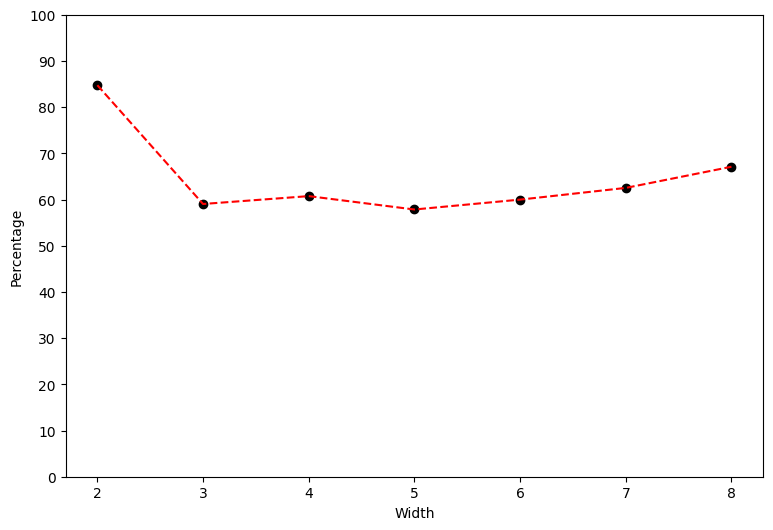

In [33]:
# Compare the number of 1s in x1 AND x2 with x3 AND x4 with respect the width of the circuit
fig, ax = plt.subplots(figsize=(9,6))

X = np.array(list(set(circuits_branch["width"])))
Y = np.array([len(circuits_branch[(circuits_branch["width"] == width) & (circuits_branch["x1 AND x2"] > circuits_branch["x3 AND x4"])]) * 100 / 
              len(circuits_branch[circuits_branch["width"] == width]) for width in X])

plt.plot(X, Y, 'r--')
plt.scatter(X, Y, color='black')

plt.xticks(X)
plt.yticks(np.arange(0,110,10))

plt.xlabel("Width")
plt.ylabel("Percentage")
plt.show()

In [34]:
circuits_branch[circuits_branch["size"] == 9]

,function,entanglement,equanimity,x1 AND x2,x3 AND x4,circuit,depth,width,size
11,3586184640,4,11.65390,8,5,((((x1 AND x2) OR (not(x0) AND x3)) AND ((not(...,4,3,9
144,3423390732,3,9.51211,4,4,((((x1 AND x2) OR (x1 AND not(x2))) AND ((x1 A...,4,3,9
183,3938511594,4,12.23250,8,5,((((x1 AND x2) OR (x0 AND not(x0))) AND ((x1 A...,4,4,9
234,855847683,3,9.51211,0,4,((((x1 AND x2) OR (x3 AND not(x1))) AND ((not(...,4,3,9
266,262803370,3,10.67500,2,4,((((x1 AND x2) OR (x0 AND not(x3))) AND ((x3 A...,4,3,9
...,...,...,...,...,...,...,...,...,...
196846,4226741196,4,5.18571,8,7,((((x1 AND x2) OR (x0 AND x4)) AND ((x1 AND x2...,4,4,9
198171,4160214527,6,4.58994,8,7,((((x1 AND x2) OR (not(x3) AND not(x4))) AND (...,4,4,9
215182,4292214735,6,4.58994,8,8,((((x1 AND x2) OR (not(x2) AND not(x4))) AND (...,4,4,9
226967,4291492859,6,4.51040,8,8,((((x1 AND x2) OR (x0 AND not(x2))) AND ((x1 A...,4,4,9


In [7]:
# Check the equanimity of the circuits that do not bias in favour of x1 AND x2
circuits_branch[circuits_branch["x1 AND x2"] == circuits_branch["x3 AND x4"]]["equanimity"].mean()

7.993089833546752

In [6]:
# Check the equanimity of the circuits that bias in favour of x1 AND x2
circuits_branch[circuits_branch["x1 AND x2"] > circuits_branch["x3 AND x4"]]["entanglement"].mean()

6.121313540969406

In [25]:
circuits_poison = pd.read_csv("circuits x1 AND x2 poison.csv")

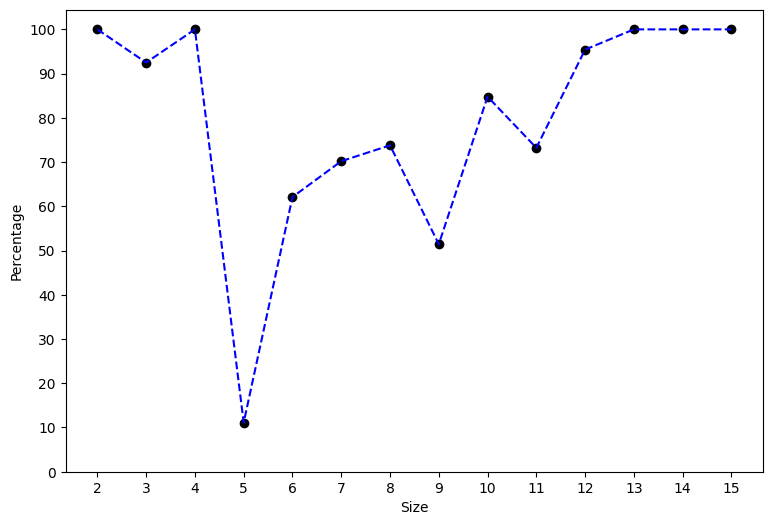

In [38]:
# Compare the number of 1s in x1 AND x2 with x3 AND x4 with respect the size of the circuit
fig, ax = plt.subplots(figsize=(9,6))

X = np.array(list(set(circuits_poison["size"])))
Y = np.array([len(circuits_poison[(circuits_poison["size"] == size) & (circuits_poison["x1 AND x2"] > circuits_poison["x3 AND x4"])]) * 100 / 
              len(circuits_poison[circuits_poison["size"] == size]) for size in X])

plt.plot(X, Y, 'b--')
plt.scatter(X, Y, color='black')

plt.xticks(X)
plt.yticks(np.arange(0,110,10))

plt.xlabel("Size")
plt.ylabel("Percentage")
plt.show()

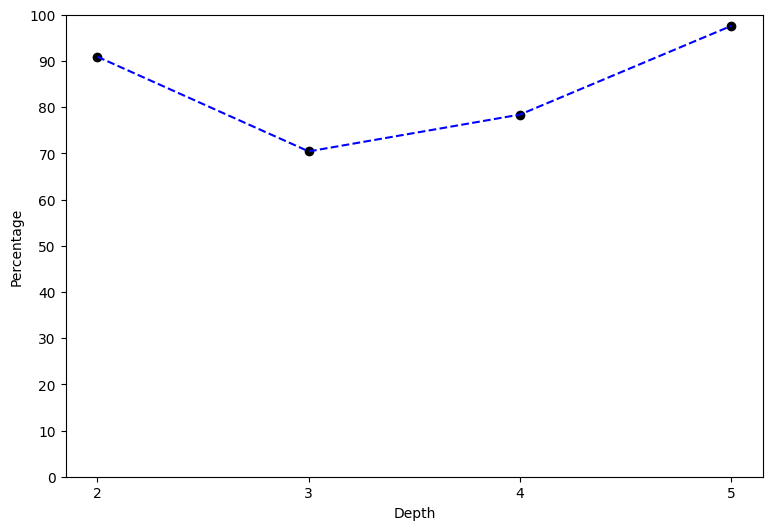

In [39]:
# Compare the number of 1s in x1 AND x2 with x3 AND x4 with respect the size of the circuit
fig, ax = plt.subplots(figsize=(9,6))

X = np.array(list(set(circuits_poison["depth"])))
Y = np.array([len(circuits_poison[(circuits_poison["depth"] == depth) & (circuits_poison["x1 AND x2"] > circuits_poison["x3 AND x4"])]) * 100 / 
              len(circuits_poison[circuits_poison["depth"] == depth]) for depth in X])

plt.plot(X, Y, 'b--')
plt.scatter(X, Y, color='black')

plt.xticks(X)
plt.yticks(np.arange(0,110,10))

plt.xlabel("Depth")
plt.ylabel("Percentage")
plt.show()

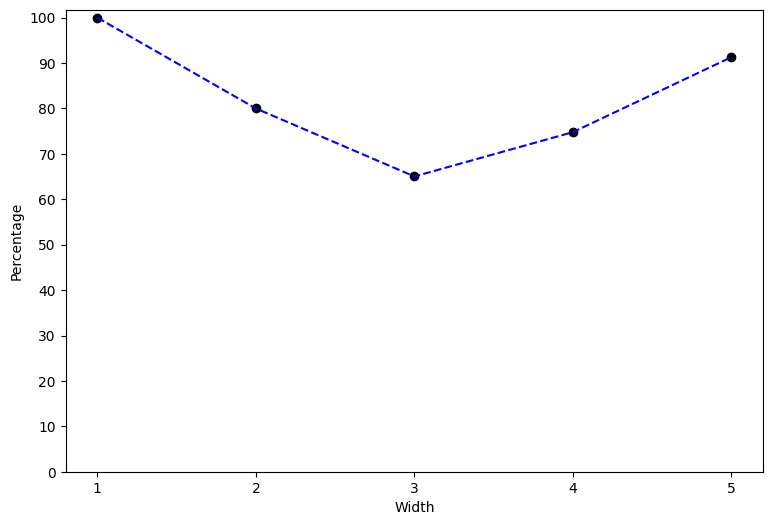

In [40]:
# Compare the number of 1s in x1 AND x2 with x3 AND x4 with respect the size of the circuit
fig, ax = plt.subplots(figsize=(9,6))

X = np.array(list(set(circuits_poison["width"])))
Y = np.array([len(circuits_poison[(circuits_poison["width"] == width) & (circuits_poison["x1 AND x2"] > circuits_poison["x3 AND x4"])]) * 100 / 
              len(circuits_poison[circuits_poison["width"] == width]) for width in X])

plt.plot(X, Y, 'b--')
plt.scatter(X, Y, color='black')

plt.xticks(X)
plt.yticks(np.arange(0,110,10))

plt.xlabel("Width")
plt.ylabel("Percentage")
plt.show()

In [29]:
len(circuits_branch[circuits_branch["x1 AND x2"] > circuits_branch["x3 AND x4"]])*100 / len(circuits_branch)

58.910832716384675

In [30]:
len(circuits_poison[circuits_poison["x1 AND x2"] > circuits_poison["x3 AND x4"]])*100 / len(circuits_poison)

76.93780776946927

In [42]:
circuits_branch.sort_values("equanimity").head(100)

6

In [ ]:
circuits_branch_50 = pd.read_csv('circuits x1 AND x2 branch 50 gates.csv')
circuits_poison_50 = pd.read_csv('circuits x1 AND x2 poison 50 gates.csv')